In [1]:
import numpy as np
import pandas as pd
from nltk import *
import tensorflow as tf
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to C:\Users\DEVANSH
[nltk_data]     JAIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\DEVANSH
[nltk_data]     JAIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
dftamil=pd.read_csv('tamil_train.csv')
dfmal=pd.read_csv('mal_train.csv')
dfkannada=pd.read_csv('kannada_train.csv')
dftamiltest=pd.read_csv('tamil_test.csv')
dfmaltest=pd.read_csv('mal_test.csv')
dfkannadatest=pd.read_csv('kannada_test.csv')

In [3]:
print(dftamil.shape)
print(dfkannada.shape)
print(dfmal.shape)
print(dftamiltest.shape)
print(dfkannadatest.shape)
print(dfmaltest.shape)

(35138, 2)
(6216, 2)
(16010, 2)
(4391, 9)
(777, 1)
(2000, 1)


###  Table Changes

In [4]:
dftamiltest=dftamiltest.drop(['Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'], axis = 1) 

In [13]:
dfmaltest['Fefka ee padam release cheyyan samadhicho? '][0]

'എന്ത് ഊള എഡിറ്റിംഗ് ആടോ ഇത് ഒരുമാതിരി vivo videoorderil ചെയ്തപോലെ'

In [14]:
dft=pd.DataFrame({"movie vara level la Erika poguthu":["movie vara level la Erika poguthu"],
                 "Not_offensive":["Not_offensive"]})
dfk=pd.DataFrame({"Tik tok alli jagala madtidralla adra baggenu ondu video madi anna super agi ugididdira":["Tik tok alli jagala madtidralla adra baggenu ondu video madi anna super agi ugididdira"],
                 "Not_offensive":["Not_offensive"]})
dfttest=pd.DataFrame({"14.12.2018 epo trailer pathutu irken ... Semaya iruku":["14.12.2018 epo trailer pathutu irken ... Semaya iruku"]})
dfktest=pd.DataFrame({"Anna nim e vedio nodinu mathe chaina apps use madidre...nijakku avru maryade  swabhiman ildoru bharatha dalli irbardu ....antavrnella nimhange maryade thegibeku..... ":["Anna nim e vedio nodinu mathe chaina apps use madidre...nijakku avru maryade  swabhiman ildoru bharatha dalli irbardu ....antavrnella nimhange maryade thegibeku..... "]})
dfmtest=pd.DataFrame({"Fefka ee padam release cheyyan samadhicho? ":["Fefka ee padam release cheyyan samadhicho? "]})

In [15]:
datat=dft.append(dftamil, ignore_index = True)
datak=dfk.append(dfkannada, ignore_index = True)
datatt=dfttest.append(dftamiltest, ignore_index = True)
datakt=dfktest.append(dfkannadatest, ignore_index = True)
datamt=dfmtest.append(dfmaltest, ignore_index = True)

In [37]:
data_tamil=datat.rename(columns={"movie vara level la Erika poguthu": "text", "Not_offensive": "label"})
data_kannada=datak.rename(columns={"Tik tok alli jagala madtidralla adra baggenu ondu video madi anna super agi ugididdira": "text", "Not_offensive": "label"})
data_tamiltest=datatt.rename(columns={"14.12.2018 epo trailer pathutu irken ... Semaya iruku": "text"})
data_kannadatest=datakt.rename(columns={"Anna nim e vedio nodinu mathe chaina apps use madidre...nijakku avru maryade  swabhiman ildoru bharatha dalli irbardu ....antavrnella nimhange maryade thegibeku..... ": "text"})
data_maltest=datamt.rename(columns={"Fefka ee padam release cheyyan samadhicho? ": "text"})

In [38]:
print(data_tamil.shape)
print(data_kannada.shape)
print(dfmal.shape)
print(data_tamiltest.shape)
print(data_kannadatest.shape)
print(data_maltest.shape)

(35139, 2)
(6217, 2)
(16010, 2)
(4392, 1)
(778, 1)
(2001, 1)


### Concatenate

In [41]:
datafinal=pd.concat([data_tamil,data_kannada,dfmal])
datafinaltest=pd.concat([data_tamiltest,data_kannadatest,data_maltest])

In [43]:
datafinaltest

,text
0,14.12.2018 epo trailer pathutu irken ... Semay...
1,Paka thana poro movie la Enna irukunu
2,“U kena tunggu lebih lama lagi untuk tahu saya...
3,Suriya anna vera level anna mass
4,suma kaththaatha da sound over a pooda kudaath...
5,ஆனவக் கொலைகள் நடக்காவிடில் ...நம் அடையாளம் அளி...
6,teasere intha alavukk masss aa irunthal padam ...
7,Enthanai kudumbam velila sollamudiyama sethuku...
8,Power ranger megazord niyabagam vantha hit like
9,Parkavakula Udayar


In [44]:
df_train = datafinal.sample(frac=1).reset_index(drop=True) #shuffling
df_test = datafinaltest.sample(frac=1).reset_index(drop=True) #shuffling

In [45]:
df_test.shape

(7171, 1)

### Numerical value given to labels

In [46]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df_train['Label']=labelencoder.fit_transform(df_train['label'])

In [47]:
df_train.head()

,text,label,Label
0,Kajal Fans Subscribe,Not_offensive,0
1,Enda padam muluka ipdiye kathuviya.. ada saami...,Offensive_Targeted_Insult_Individual,2
2,Yogi sema Vijay mathiriye apdeye mimicry pandr...,Not_offensive,0
3,"SUCH A LOVELY ACTING THALA , LOVE U",Not_offensive,0
4,மயிருக்கு கருமை தரும் கறிவேப்பிலையின் கருமை தம...,Not_offensive,0


In [48]:
df_train['Label'].value_counts()

0    43122
4     3309
2     3069
1     3026
5     1522
6     1454
7     1287
3      577
Name: Label, dtype: int64

# Pre-Processing

In [49]:
y=[]
y=df_train['Label'].values
y.shape

(57366,)

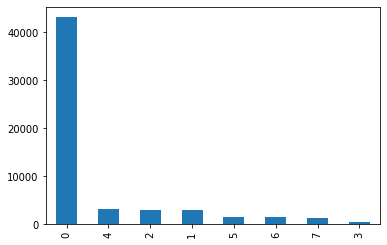

In [50]:
df_train['Label'].value_counts().plot(kind='bar')

In [51]:
df_train = df_train.apply(lambda x: x.astype(str).str.lower()) #Lower case
df_test = df_test.apply(lambda x: x.astype(str).str.lower()) #Lower case

In [54]:
df_train['text']=df_train['text'].str.replace('[^\s\w]','') #removing punctuations
df_test['text']=df_test['text'].str.replace('[^\s\w]','') #removing punctuations

In [55]:
df_train['text_token'] = df_train['text'].apply(lambda x: word_tokenize(x)) #sentence converted to words
df_test['text_token'] = df_test['text'].apply(lambda x: word_tokenize(x)) #sentence converted to words

In [56]:
ps = PorterStemmer() 
df_train['text'] = df_train['text_token'].apply(lambda x: list(ps.stem(i) for i in x)) #Stemming
df_test['text'] = df_test['text_token'].apply(lambda x: list(ps.stem(i) for i in x)) #Stemming

In [58]:
stops = set(stopwords.words("english"))                  

df_train['text'] = df_train['text'].apply(lambda x: ' '.join(list(i for i in x if i not in stops))) #removind all the stopwords
df_test['text'] = df_test['text'].apply(lambda x: ' '.join(list(i for i in x if i not in stops))) #removind all the stopwords

In [59]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

df_train['text'] =df_train['text'].apply(lambda x: lemmatizer.lemmatize(x))
df_test['text'] =df_test['text'].apply(lambda x: lemmatizer.lemmatize(x))

[nltk_data] Downloading package wordnet to C:\Users\DEVANSH
[nltk_data]     JAIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [63]:
df_train.head()

,text,label,Label,text_token
0,kajal fan subscrib,not_offensive,0,"[kajal, fans, subscribe]"
1,enda padam muluka ipdiy kathuviya ada saami na...,offensive_targeted_insult_individual,2,"[enda, padam, muluka, ipdiye, kathuviya, ada, ..."
2,yogi sema vijay mathiriy apdey mimicri pandra ...,not_offensive,0,"[yogi, sema, vijay, mathiriye, apdeye, mimicry..."
3,love act thala love u,not_offensive,0,"[such, a, lovely, acting, thala, love, u]"
4,மயரகக கரம தரம கறவபபலயன கரம தமழ மககனங கயரகக அஞச...,not_offensive,0,"[மயரகக, கரம, தரம, கறவபபலயன, கரம, தமழ, மககனங, க..."


In [64]:
df_test.head()

,text,text_token
0,samma song mudiyav mudiyathu bro paaaafrom tha...,"[samma, song, mudiyave, mudiyathu, bro, paaaaf..."
1,130 la vara dialogu mass,"[130, the, la, vara, dialogue, mass]"
2,like kaappaan ngk,"[i, like, kaappaan, more, than, ngk]"
3,director ranjith pardhu sakattum avan mattum s...,"[director, ranjith, pardhu, sakattum, avan, ma..."
4,teaser la iruntha yedho onnu trailer la miss a...,"[teaser, la, iruntha, yedho, onnu, trailer, la..."


In [65]:
y=df_train['text'].values
z=df_test['text'].values

In [66]:
def tokenize(c_train,c_test):
    tweet_tokenizer = TweetTokenizer() 
    vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, max_features = 1010)
    Xy_train = vectorizer.fit_transform(c_train).toarray()
    Xz_test = vectorizer.fit_transform(c_test).toarray()
    return Xy_train,Xztest

In [69]:
Xy_train,Xz_test = tokenize(y,z)
Xy_train.shape,Xz_test.test

NameError: name 'Xz_train' is not defined

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
model.fit(Xz_train, df_train['Label'])
y_pred = model.predict(df_test)

ValueError: could not convert string to float: 'Bgm is good'